In [8]:
%reload_ext autoreload
%autoreload 2

import os
import sys
while os.path.split(os.getcwd())[1] != 'RecSysChallenge2023-Team':
    os.chdir('..')
sys.path.insert(1, os.getcwd())

import numpy as np

In [2]:
import numpy as np
import pandas as pd
import scipy.sparse as sp

from datetime import timedelta
from ast import literal_eval

import random

from sklearn.model_selection import train_test_split
from typing import Optional

In [3]:
import os
from Recommenders.SLIM.Cython.SLIM_BPR_Cython import SLIM_BPR_Cython

output_folder_path = os.getcwd() + "/Federico/Recommenders/SLIM_ElasticNet/result_experiments_binary/"

# If directory does not exist, create
if not os.path.exists(output_folder_path):
    os.makedirs(output_folder_path)

n_cases = 100  # using 10 as an example
n_random_starts = int(n_cases * 0.3)
metric_to_optimize = "MAP_MIN_DEN"
cutoff_to_optimize = 10
recommender_class = SLIM_BPR_Cython

In [4]:
output_folder_path

'/Users/federicobono/Documenti/Polimi/RecSys/repos/RecSysChallenge2023-Team/Daniele/Recommenders/SLIM_ElasticNet/result_experiments/'

In [5]:
from Recommenders.DataIO import DataIO

data_loader = DataIO(folder_path = output_folder_path)
search_metadata = data_loader.load_data("massive_optimization_metadata.zip")

search_metadata.keys()

dict_keys(['time_on_validation_total', 'time_on_test_total', 'time_on_test_avg', 'metric_to_optimize', 'result_on_last', 'algorithm_name_search', 'cutoff_to_optimize', 'result_on_test_best', 'hyperparameters_best', 'result_on_earlystopping_df', 'algorithm_name_recommender', 'time_df', 'time_on_train_total', 'exception_list', 'hyperparameters_best_index', 'hyperparameters_df', 'result_on_validation_df', 'time_on_validation_avg', 'result_on_test_df', 'time_on_train_avg', 'time_on_last_df', 'result_on_validation_best'])

In [6]:
hyperparameters_df = search_metadata["hyperparameters_df"]
hyperparameters_df

,alpha,l1_ratio,topK
0,0.955186,0.047322,183
1,0.034571,0.040893,715
2,0.193997,0.001772,859
3,0.706228,0.047855,570
4,0.760146,0.037825,239
...,...,...,...
1995,NaN,NaN,NaN
1996,NaN,NaN,NaN
1997,NaN,NaN,NaN
1998,NaN,NaN,NaN


In [7]:
result_on_validation_df = search_metadata["result_on_validation_df"]
result_on_validation_df

,,PRECISION,PRECISION_RECALL_MIN_DEN,RECALL,MAP,MAP_MIN_DEN,MRR,NDCG,F1,HIT_RATE,ARHR_ALL_HITS,...,COVERAGE_USER,COVERAGE_USER_HIT,USERS_IN_GT,DIVERSITY_GINI,SHANNON_ENTROPY,RATIO_DIVERSITY_HERFINDAHL,RATIO_DIVERSITY_GINI,RATIO_SHANNON_ENTROPY,RATIO_AVERAGE_POPULARITY,RATIO_NOVELTY
,cutoff,,,,,,,,,,,,,,,,,,,,,
0,10,0.000159,0.00037,0.000361,0.000047,0.000105,0.000465,0.000257,0.000221,0.00159,0.000465,...,0.982104,0.001561,0.982104,0.000502,4.013509,0.931412,0.001137,0.297558,0.068308,0.48522
1,10,0.036325,0.058259,0.054023,0.016871,0.026977,0.124872,0.056793,0.04344,0.264798,0.144491,...,0.982104,0.260059,0.982104,0.003,6.72458,0.984025,0.006799,0.498555,5.479344,0.321386
2,10,0.037477,0.061172,0.056972,0.016683,0.027002,0.12404,0.05775,0.045213,0.276759,0.143231,...,0.982104,0.271806,0.982104,0.003258,6.544434,0.97644,0.007384,0.485199,6.803212,0.294809
3,10,0.000159,0.00037,0.000361,0.000047,0.000105,0.000465,0.000257,0.000221,0.00159,0.000465,...,0.982104,0.001561,0.982104,0.000502,4.013509,0.931412,0.001137,0.297558,0.068308,0.48522
4,10,0.000159,0.00037,0.000361,0.000047,0.000105,0.000465,0.000257,0.000221,0.00159,0.000465,...,0.982104,0.001561,0.982104,0.000502,4.013509,0.931412,0.001137,0.297558,0.068308,0.48522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
result = pd.merge(
    left=hyperparameters_df.reset_index(),
    right=result_on_validation_df[['MAP_MIN_DEN']].reset_index(),
    left_index=True,
    right_index=True
)

result

,index,alpha,l1_ratio,topK,level_0,cutoff,MAP_MIN_DEN
0,0,0.955186,0.047322,183,0,10,0.000105
1,1,0.034571,0.040893,715,1,10,0.026977
2,2,0.193997,0.001772,859,2,10,0.027002
3,3,0.706228,0.047855,570,3,10,0.000105
4,4,0.760146,0.037825,239,4,10,0.000105
...,...,...,...,...,...,...,...
1995,1995,NaN,NaN,NaN,1995,10,NaN
1996,1996,NaN,NaN,NaN,1996,10,NaN
1997,1997,NaN,NaN,NaN,1997,10,NaN
1998,1998,NaN,NaN,NaN,1998,10,NaN


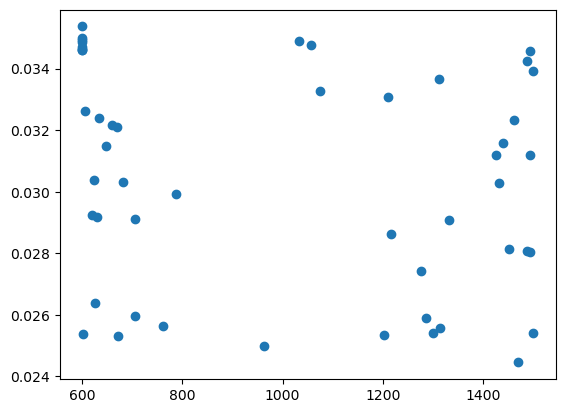

In [87]:
import matplotlib.pyplot as plt

plt.plot(result['topK'], result.MAP_MIN_DEN, 'o')

In [76]:
result_best_on_test = search_metadata["result_on_last"]
result_best_on_test

,PRECISION,PRECISION_RECALL_MIN_DEN,RECALL,MAP,MAP_MIN_DEN,MRR,NDCG,F1,HIT_RATE,ARHR_ALL_HITS,...,COVERAGE_USER,COVERAGE_USER_HIT,USERS_IN_GT,DIVERSITY_GINI,SHANNON_ENTROPY,RATIO_DIVERSITY_HERFINDAHL,RATIO_DIVERSITY_GINI,RATIO_SHANNON_ENTROPY,RATIO_AVERAGE_POPULARITY,RATIO_NOVELTY
cutoff,,,,,,,,,,,,,,,,,,,,,
10,0.007956,0.07956,0.07956,0.003325,0.033249,0.033249,0.044065,0.014465,0.07956,0.033249,...,1.0,0.07956,1.0,0.0159,8.577851,0.993078,0.035918,0.636269,4.347323,0.215231


In [77]:
best_hyperparameters = search_metadata["hyperparameters_best"]
best_hyperparameters

{'topK': 600,
 'epochs': 300,
 'symmetric': True,
 'sgd_mode': 'sgd',
 'lambda_i': 2.949963422566918e-05,
 'lambda_j': 1e-05,
 'learning_rate': 0.06211155651251035}